In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Setting working directory
os.chdir("E:\data science_edwisor\Project 1 bike prediction")
#Reading dataset
data = pd.read_csv('day.csv')
backup_data = data

In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
data.shape

(731, 16)

We have 731 observations, 15 predictors and 1 target variable. Cnt is our target variable. Next examining variable types

In [7]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In the dataset season, yr, mnth, holiday, weekday, workingday, weathersit predictors should be categorical type, but they are int64. In the next step mapping and categorical transformatin will be performed.

In [8]:
#Converting to categorical variable
categorical_variable = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
for var in categorical_variable:
    data[var]=data[var].astype("category")

In [9]:
data.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

Droping variables which are not requried.

instant - index number
dteday- all the requried like month week day all ready present
casual and resgistered - their sum is equal to cnt ie. to the target variable

In [10]:
data1 = data.drop(["instant","dteday","casual","registered"],axis=1)

In [11]:
data1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [12]:
#Missing data
data1.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

There are no null value in the data set

C:\Users\abhir\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\abhir\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\abhir\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\abhir\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`;

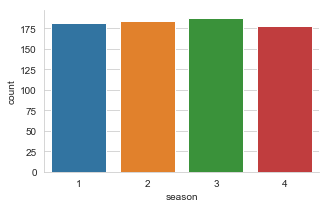

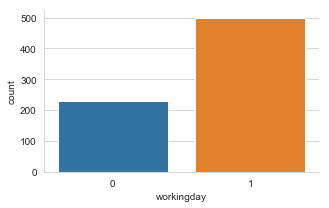

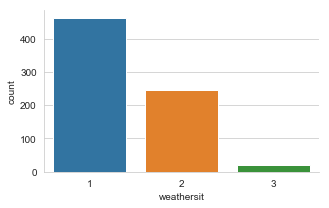

In [13]:
# Distribution of the Categorical variable using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=data1, x='season', kind='count', size=3, aspect=1.5)
sns.factorplot(data=data1, x='workingday', kind='count', size=3, aspect=1.5)
sns.factorplot(data=data1, x='weathersit', kind='count', size=3, aspect=1.5)

C:\Users\abhir\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Temp')

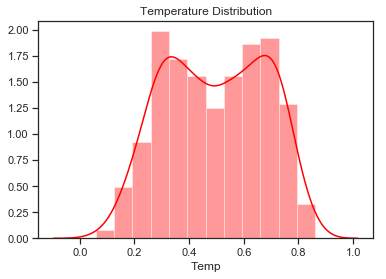

In [14]:
# Distribution of the continuous or numerical variable using histogram
sns.set(style="ticks")
sns.distplot(data1['temp'],color='red') # .set_title("Temperature Distribution")
plt.title("Temperature Distribution")
plt.xlabel("Temp")


Text(0.5, 0, 'Temperature Distribution')

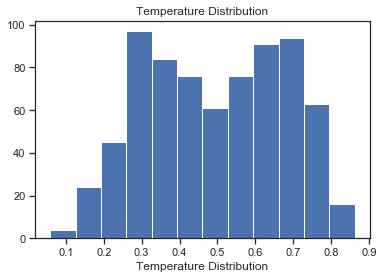

In [15]:
plt.hist(data=data1,x='temp',bins='auto')
plt.title('Temperature Distribution')
plt.xlabel('Temperature Distribution')

Text(0.5, 0, 'Atemp')

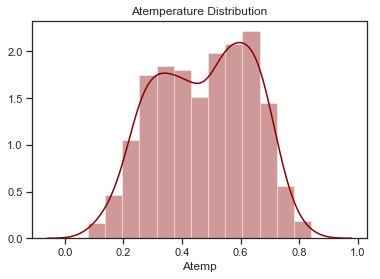

In [16]:
sns.distplot(data1['atemp'],color='darkred')
plt.title('Atemperature Distribution')
plt.xlabel('Atemp')

Text(0.5, 0, 'Atemp')

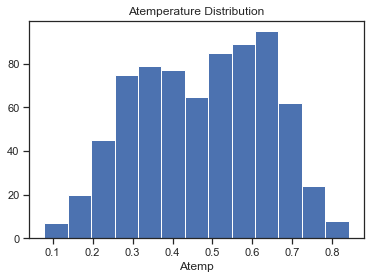

In [17]:
plt.hist(data=data1,x='atemp', bins='auto')
plt.title('Atemperature Distribution')
plt.xlabel('Atemp')

Text(0.5, 0, 'Hum')

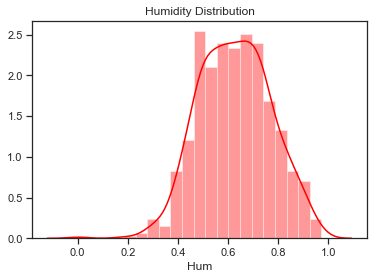

In [18]:
sns.distplot(data1['hum'],color='red')
plt.title('Humidity Distribution')
plt.xlabel('Hum')

Text(0.5, 0, 'hum')

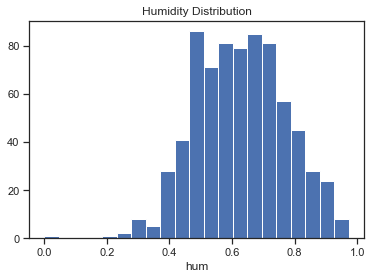

In [19]:
plt.hist(data=data1,x='hum',bins='auto')
plt.title('Humidity Distribution')
plt.xlabel('hum')

Text(0.5, 0, 'Windspeed')

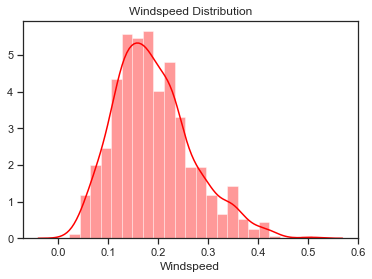

In [20]:
sns.distplot(data1['windspeed'],color='red')
plt.title('Windspeed Distribution')
plt.xlabel('Windspeed')

Text(0.5, 0, 'Winspeed')

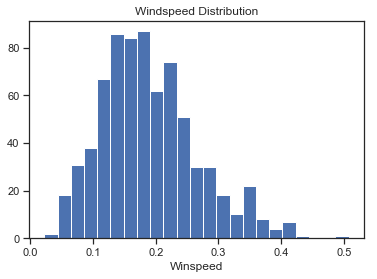

In [21]:
plt.hist(data=data1,x='windspeed',bins='auto')
plt.title('Windspeed Distribution')
plt.xlabel('Winspeed')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

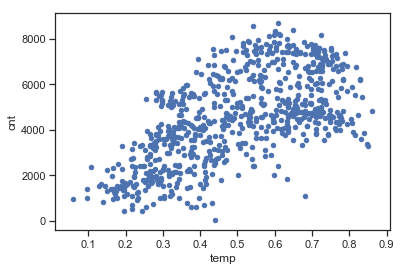

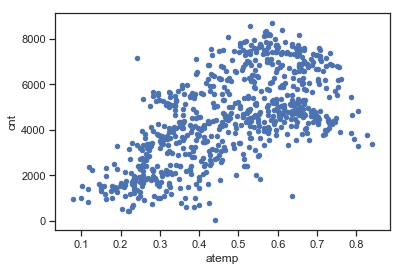

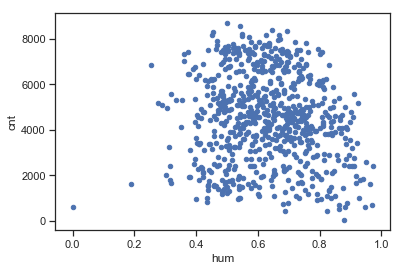

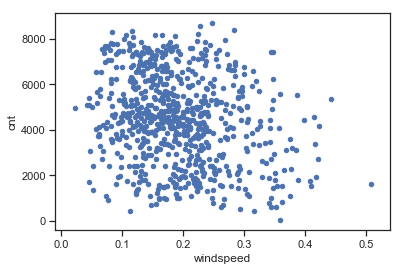

In [22]:
# Relation between continuous or numeric variables against bike count using scatter plot
data1.plot.scatter(x='temp',y='cnt')
data1.plot.scatter(x='atemp',y='cnt')
data1.plot.scatter(x='hum',y='cnt')
data1.plot.scatter(x='windspeed',y='cnt')

Text(0.5, 1.0, 'Scatter plot for Windspeed')

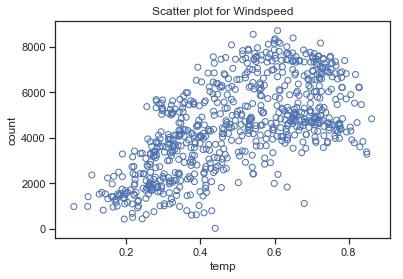

In [23]:
#or
plt.scatter(data1['temp'],data1['cnt'],facecolors='none',edgecolor='b')
plt.xlabel('temp')
plt.ylabel('count')
plt.title('Scatter plot for Windspeed')

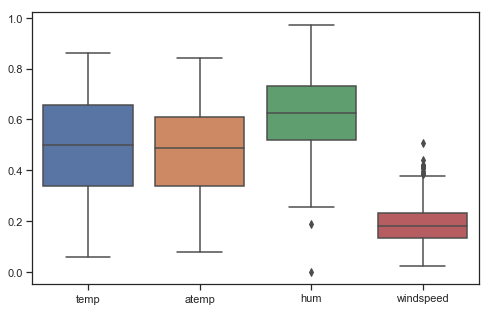

In [24]:
#outlier analysis
fig=plt.gcf()
fig.set_size_inches(8,5)
sns.boxplot(data=data1[['temp','atemp','hum','windspeed']])

In [25]:
# Removing outlire from Humidity
q75, q25 = np.percentile(data1.loc[:,'hum'],[75,25])
(q75,q25)

(0.7302085, 0.52)

In [26]:
iqr=q75-q25
iqr

0.21020850000000002

In [27]:
min= q25-(iqr*1.5)
max= q75+(iqr*1.5)
min,max

(0.20468725, 1.0455212500000002)

In [28]:
data1 = data1.drop(data1[data1.loc[:,'hum'] < min].index)
data1 = data1.drop(data1[data1.loc[:,'hum'] > max].index)

In [29]:
#Removing outlier from windspeed
q75, q25 = np.percentile(data1.loc[:,'windspeed'],[75,25])
iqr=q75-q25
min= q25-(iqr*1.5)
max= q75+(iqr*1.5)
min,max

(-0.012431000000000025, 0.380585)

In [30]:
data1 = data1.drop(data1[data1.loc[:,'windspeed'] < min].index)
data1 = data1.drop(data1[data1.loc[:,'windspeed'] > max].index)

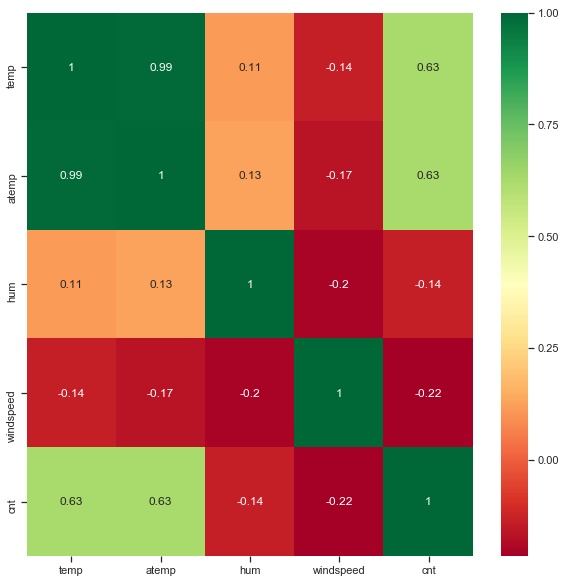

In [31]:
corrmat= data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap='RdYlGn')

temp and atemp have same impact to the target variable, so droping atemp form the dataset

In [33]:
#droping corelated variable
data1 = data1.drop(['atemp'], axis=1)

                                                # Modeling
# Deviding into train and test

In [78]:
# Importing Libraries 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
train, test = train_test_split(data1, test_size=0.2,random_state=123)

# Decission Tree

In [79]:
#train the model
dt_data = DecisionTreeRegressor(random_state=123).fit(train.iloc[:,0:10],train.iloc[:,10])

In [80]:
#Prediction of the cnt
dt_data_pred = dt_data.predict(test.iloc[:,0:10])

In [81]:
#Creating dataframe for actual and predicted value
dtpred_data = pd.DataFrame({'actual': test.iloc[:,10], 'pred': dt_data_pred})

In [82]:
dtpred_data.head()

,actual,pred
226,4338,4458.0
430,3956,3624.0
649,7570,7282.0
653,5875,7112.0
342,3620,3614.0


In [83]:
# Function for Mean Absolute Percentage Error
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual))*100
    return mape

In [84]:
#Calculate MAPE for decision tree
MAPE(test.iloc[:,10],dt_data_pred)

18.133410808725426

#MAPE: 18.13%
#Accuracy: 81.87%

# Random Forest

In [86]:
#Import library for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [101]:
#Train the model
rf_data = RandomForestRegressor(n_estimators=200,random_state=123).fit(train.iloc[:,0:10], train.iloc[:,10])

In [102]:
#Prediction on cnt
rf_data_prd = rf_data.predict(test.iloc[:,0:10])

In [103]:
#Creating dataframe for actual and predicted value
rfpred_data = pd.DataFrame({'actual': test.iloc[:,10], 'pred': rf_data_prd})
rfpred_data.head()

,actual,pred
226,4338,4572.835
430,3956,3236.005
649,7570,6737.715
653,5875,6878.000
342,3620,3551.070


In [104]:
#Calculate MAPE for decision tree
MAPE(test.iloc[:,10],rf_data_prd)

13.210907612196173

#MAPE: 13.21%

#Accuracy: 86.79%

# Linear Regression

In [105]:
#import libraries for Linear regression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [106]:
#Train the model
lr_data = sm.OLS(train.iloc[:,10].astype(float), train.iloc[:,0:10].astype(float)).fit()

In [107]:
#Check the summary of model
lr_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1668.
Date:                Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:50:40   Log-Likelihood:                -4701.6
No. Observations:                 573   AIC:                             9423.
Df Residuals:                     563   BIC:                             9467.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       501.3112     63.480      7.897      0.000     376.624     625.998
yr          2168.3079     73.667     29.434      0.000    2023.613    2313.003
mnth         -30.0943     19.918     -1.511      0.131     -69.217       9.028
holiday     -257.5053    222.399     -1.158      0.247    -694.338     179.328
weekday      111.7335     18.450      6.056      0.000      75.495     147.972
workingday   322.4296     82.505      3.908      0.000     160.374     484.485
weathersit  -723.4500     91.852     -7.876      0.000    -903.865    -543.035
temp        5366.3235    217.210     24.706      0.000    4939.682    5792.965
hum          405.5903    301.075      1.347      0.178    -185.776     996.957
windspeed   -644.3153    448.878     -1.435      0.152   -1525.996     237.366
==============================================================================
Omnibus:                       99.948   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.072
Skew:                          -0.913   Prob(JB):                     5.47e-52
Kurtosis:                       5.560   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
#Prediction of cnt
lr_data_prd = lr_data.predict(test.iloc[:,0:10])

In [110]:
#Creating dataframe for actual and predicted value
rlpred_data = pd.DataFrame({'actual': test.iloc[:,10], 'pred': lr_data_prd})
rlpred_data.head()

,actual,pred
226,4338,4701.15
430,3956,3843.87
649,7570,6323.79
653,5875,5970.17
342,3620,3591.39


In [111]:
#Calculate MAPE for decision tree
MAPE(test.iloc[:,10],lr_data_prd)

18.96148992520027

 #MAPE:18.96%
#Accuracy: 81.04%  

In [116]:
# saving the best model(Random Forest) output data
result=pd.DataFrame(test.iloc[:,0:10])
result['pred_cnt'] = (rf_data_prd)
result.to_csv("Random forest output python.csv",index=False)